# <span style= "color:Royalblue"><center>Gastos médicos</center></span>

Proyecto usando los datos méricos del [US Census Bureau](https://www.kaggle.com/datasets/mirichoi0218/insurance). Estos gastos indican la información de muchas variables.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import regressors
from sklearn.preprocessing import StandardScaler #Escalador
from sklearn.linear_model import LinearRegression #Regresión
from sklearn.model_selection import train_test_split #Crear el DS prueba y Entrenamiento
import sklearn.metrics as metrics
from regressors import stats

In [2]:
os.getcwd()

'C:\\Users\\Mateo\\Documents\\Programacion\\Platzi\\Data_Scientist\\Regresiones\\Lineal'

In [3]:
os.chdir('Datos')

In [4]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<AxesSubplot: xlabel='charges', ylabel='Count'>

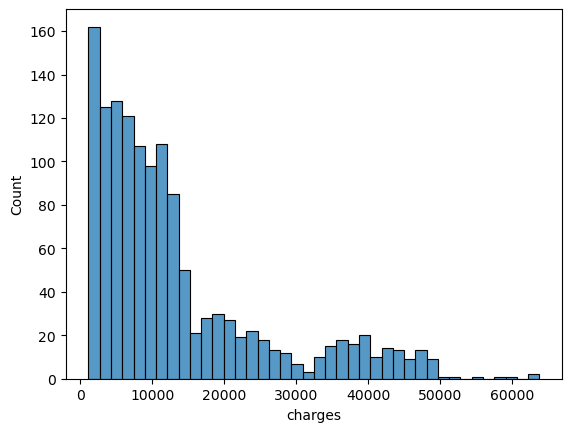

In [7]:
sns.histplot(bins=40,data=df['charges'])

In [8]:
df = df[df.charges<50000]
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


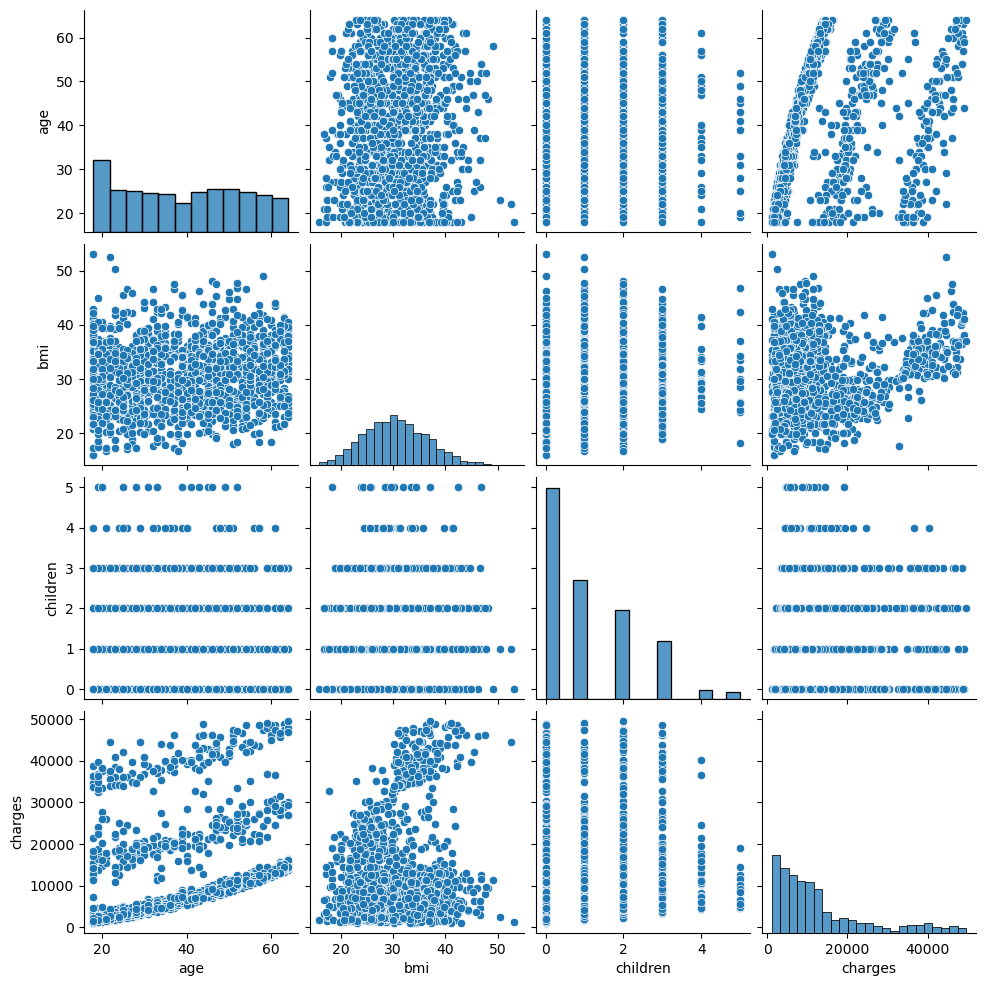

In [9]:
sns.pairplot(df,height=2.5)

<AxesSubplot: >

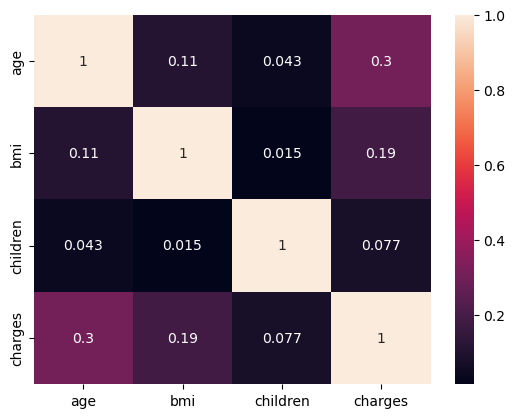

In [10]:
numeric = ['age','bmi','children','charges']
cm = np.corrcoef(df[numeric].values.T)
sns.heatmap(cm,cbar=True,annot=True,
            yticklabels=numeric,xticklabels=numeric)

### Paso de las variable categóricas a numéricas: Onehotencoding

In [11]:
df = pd.get_dummies(df,columns=['sex','smoker','region'],drop_first=True)
df.head(5)

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [53]:
X_cols = list(set(df.columns)-set(['charges']))
y_col = ['charges']

X = df[X_cols].values
y = df[y_col].values

#Split del DF en prueba y test
X_train, X_test, y_train, y_test = train_test_split(X,y)

#Escaladores
sc_x = StandardScaler().fit(X)
sc_y = StandardScaler().fit(y)

#Transformación
X_train = sc_x.transform(X_train)
X_test = sc_x.transform(X_test)
#--
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

#Modelo
model = LinearRegression()
model.fit(X_train,y_train) #Training
y_pred = model.predict(X_test) #Predict

In [54]:
y_pred.shape

(333, 1)

El shape es de (333,1) por el split y debido a que sólo se está intentando obtener el charges con respecto a las X que son todas las demás variables

### Funciones de Métricas

In [55]:
#Evaluando los valores reales del test contra los predichos
mse = metrics.mean_squared_error(y_test,y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print("r2 ", r2.round(4))
print("mse: ", mse.round(4))

r2  0.7269
mse:  0.2872


* El $R^2$ indica un valor de 0.732 lo cuál indica que es un buen modelo, arriba del 75 es muy bueno, podría ser mejor.

* El $MSE$ indica un valor de 0.2619 lo cuál indica que es bajo y ajustado. Hay que tener una consideración y es el hecho de que el MSE está entendiendo los datos estandarizados, no contempla las distancias no normalizadas.

In [56]:
model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

In [57]:
y_test = y_test.reshape(-1)

print("-----------------------Summary----------------------------")
stats.summary(model, X_test, y_test, X_cols)

-----------------------Summary----------------------------
Residuals:
    Min    1Q  Median     3Q    Max
-1.9831 -0.17  0.0857 0.2426 0.8998


Coefficients:
                  Estimate  Std. Error  t value   p value
_intercept       -0.008195    0.029732  -0.2756  0.783010
region_northwest -0.021708    0.032616  -0.6655  0.506163
bmi               0.178493    0.031396   5.6852  0.000000
children          0.043476    0.029894   1.4543  0.146802
sex_male         -0.012600    0.029757  -0.4234  0.672266
region_southwest -0.039307    0.034311  -1.1456  0.252772
smoker_yes        0.795765    0.030547  26.0503  0.000000
age               0.291934    0.030668   9.5192  0.000000
region_southeast -0.047383    0.036579  -1.2954  0.196091
---
R-squared:  0.72695,    Adjusted R-squared:  0.72021
F-statistic: 107.82 on 8 features


### Gráfica de residuales

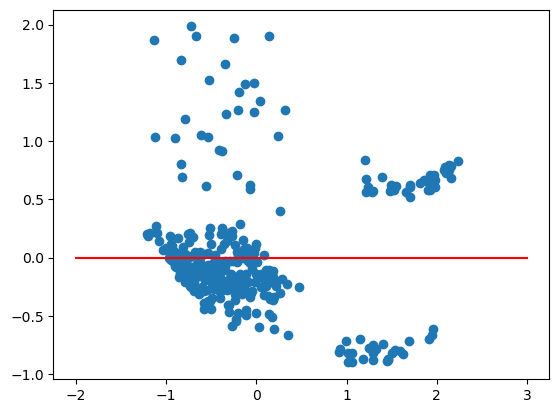

In [59]:
ejex = np.linspace(-2,3,num=50)
ejey = np.zeros(50)
residuals = np.subtract(y_test, y_pred.reshape(-1))
plt.plot(ejex,ejey,color='r',linestyle='solid')
plt.scatter(y_pred,residuals)

### Manipulación y eliminación de variables

In [62]:
df_second = df.copy()
df_second['age2'] = df_second.age**2
df_second['sobrepeso'] = (df_second.bmi >= 30).astype(int) #OneHotEncoding
df_second['sobrepeso*fumador'] = df_second.sobrepeso*df_second.smoker_yes

In [73]:
X_cols = ['sobrepeso*fumador','smoker_yes',
         'age2','children']
y_col = ['charges']

X = df_second[X_cols].values
y = df_second[y_col].values

#Split del DF en prueba y test
X_train, X_test, y_train, y_test = train_test_split(X,y)

#Escaladores
sc_x = StandardScaler().fit(X)
sc_y = StandardScaler().fit(y)

#Transformación
X_train = sc_x.transform(X_train)
X_test = sc_x.transform(X_test)
#--
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

#Modelo
model = LinearRegression(fit_intercept=False)
model.fit(X_train,y_train) #Training
y_pred = model.predict(X_test) #Predict

y_pred.shape

(333, 1)

In [74]:
#Evaluando los valores reales del test contra los predichos
mse = metrics.mean_squared_error(y_test,y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print("r2 ", r2.round(4))
print("mse: ", mse.round(4))

r2  0.8919
mse:  0.1123


In [77]:
model.coef_ = model.coef_.reshape(-1)

In [78]:
y_test = y_test.reshape(-1)

print("-----------------------Summary----------------------------")
stats.summary(model, X_test, y_test, X_cols)

-----------------------Summary----------------------------
Residuals:
    Min     1Q  Median     3Q   Max
-1.9157 0.0644  0.1158 0.1419 1.526


Coefficients:
                   Estimate  Std. Error  t value   p value
_intercept         0.000000    0.018367   0.0000  1.000000
sobrepeso*fumador  0.495741    0.023109  21.4525  0.000000
smoker_yes         0.452242    0.023092  19.5842  0.000000
age2               0.317414    0.018692  16.9809  0.000000
children           0.070758    0.018818   3.7602  0.000201
---
R-squared:  0.89187,    Adjusted R-squared:  0.89055
F-statistic: 676.33 on 4 features


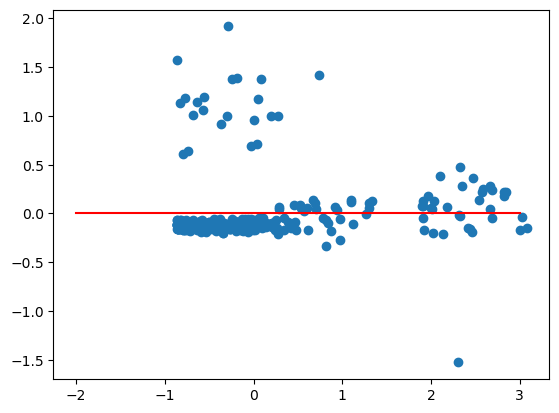

In [79]:
ejex = np.linspace(-2,3,num=50)
ejey = np.zeros(50)
residuals = np.subtract(y_test, y_pred.reshape(-1))
plt.plot(ejex,ejey,color='r',linestyle='solid')
plt.scatter(y_pred,residuals)